In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Leer CSV

In [ ]:
listings = pd.read_csv("listings.csv")
listings.head(1)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,269467,https://www.airbnb.com/rooms/269467,20240615011618,2024-06-15,city scrape,Sunny and quiet Loft next to Sagrada Familia,The apartment is a cosy open space with 65 m2....,NaN,https://a0.muscache.com/pictures/a6445a90-94eb...,1411775,...,4.79,4.81,4.67,HUTB-001129,t,3,3,0,0,1.15


### Shape

In [ ]:
listings.shape

(18925, 75)

### Columns

In [ ]:
list(listings.columns)

['id',
 'listing_url',
 'scrape_id',
 'last_scraped',
 'source',
 'name',
 'description',
 'neighborhood_overview',
 'picture_url',
 'host_id',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'neighbourhood',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'latitude',
 'longitude',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bathrooms_text',
 'bedrooms',
 'beds',
 'amenities',
 'price',
 'minimum_nights',
 'maximum_nights',
 'minimum_minimum_nights',
 'maximum_minimum_nights',
 'minimum_maximum_nights',
 'maximum_maximum_nights',
 'minimum_nights_avg_ntm',
 'maximum_nights_avg_ntm',
 'calendar_updated',
 'has_availability',
 'availability_30

### Sample

In [ ]:
listings.sample()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
13466,877483571159475574,https://www.airbnb.com/rooms/877483571159475574,20240615011618,2024-06-15,city scrape,SweetGaudìHome,My cozy appartament is the perfect choice for ...,NaN,https://a0.muscache.com/pictures/ae65c412-27d3...,213758720,...,3.33,4.0,3.0,HUTB-005729,f,1,1,0,0,0.32


# Columnas a eliminar 

columnas_a_eliminar = ['id', 'listing_url', 'scrape_id', 'last_scraped', 'source','neighborhood_overview','picture_url','host_id', 'host_url', 'host_name','host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_thumbnail_url', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'neighbourhood', 'neighbourhood_cleansed', 'minimum_minimum_nights','maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm','maximum_nights_avg_ntm', 'calendar_updated', 'availability_90', 'availability_365', 'calendar_last_scraped', 'number_of_reviews','number_of_reviews_ltm', 'number_of_reviews_l30d', 'first_review', 'last_review', 'review_scores_accuracy', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms','calculated_host_listings_count_shared_rooms']

In [ ]:
columnas_a_eliminar = [0,1,2,3,4,7,8,9,10,11,14,15,16,17,19,20,21,22,23,24,27,28,43,44,45,46,47,48,49,53,54,55,57,58,59,62,70,71,72,73]
listings_clean = listings.drop(listings.columns[columnas_a_eliminar], axis=1)

### Shape

In [ ]:
listings_clean.shape

(18925, 35)

### info

In [ ]:
listings_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18925 entries, 0 to 18924
Data columns (total 35 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   name                          18925 non-null  object 
 1   description                   18242 non-null  object 
 2   host_since                    18923 non-null  object 
 3   host_location                 14497 non-null  object 
 4   host_is_superhost             18801 non-null  object 
 5   host_has_profile_pic          18923 non-null  object 
 6   host_identity_verified        18923 non-null  object 
 7   neighbourhood_group_cleansed  18925 non-null  object 
 8   latitude                      18925 non-null  float64
 9   longitude                     18925 non-null  float64
 10  property_type                 18925 non-null  object 
 11  room_type                     18925 non-null  object 
 12  accommodates                  18925 non-null  int64  
 13  b

### Nulos

In [ ]:
listings_clean.isnull().sum()

name                               0
description                      683
host_since                         2
host_location                   4428
host_is_superhost                124
host_has_profile_pic               2
host_identity_verified             2
neighbourhood_group_cleansed       0
latitude                           0
longitude                          0
property_type                      0
room_type                          0
accommodates                       0
bathrooms                       3743
bathrooms_text                    23
bedrooms                        1882
beds                            3838
amenities                          0
price                           3736
minimum_nights                     0
maximum_nights                     0
has_availability                1050
availability_30                    0
availability_60                    0
number_of_reviews                  0
last_review                     4787
review_scores_rating            4787
r

In [ ]:
listings_clean.isnull().mean() * 100

name                             0.000000
description                      3.608983
host_since                       0.010568
host_location                   23.397622
host_is_superhost                0.655218
host_has_profile_pic             0.010568
host_identity_verified           0.010568
neighbourhood_group_cleansed     0.000000
latitude                         0.000000
longitude                        0.000000
property_type                    0.000000
room_type                        0.000000
accommodates                     0.000000
bathrooms                       19.778071
bathrooms_text                   0.121532
bedrooms                         9.944518
beds                            20.280053
amenities                        0.000000
price                           19.741083
minimum_nights                   0.000000
maximum_nights                   0.000000
has_availability                 5.548217
availability_30                  0.000000
availability_60                  0

# Mis Columnas

'has_availability', 'availability_30', 'availability_60', 'number_of_reviews', 'last_review', 'review_scores_rating', 'review_scores_cleanliness'

In [ ]:
listings_clean["has_availability"].isnull().sum()

1050

In [ ]:
listings_clean["availability_30"].isnull().sum()

0

In [ ]:
listings_clean["availability_60"].isnull().sum()

0

In [ ]:
listings_clean["number_of_reviews"].isnull().sum()

0

In [ ]:
listings_clean["last_review"].isnull().sum()

4787

In [ ]:
listings_clean["review_scores_rating"].isnull().sum()

4787

In [ ]:
listings_clean["review_scores_cleanliness"].isnull().sum()

4808

### Columna "price"

eliminar los valores nulos de la columna "price"

In [ ]:
listings_clean["price"].isnull().sum()

3736

In [ ]:
listings_clean = listings_clean.dropna(subset=["price"])

In [ ]:
listings_clean['price'] = listings_clean['price'].str.replace('[\$,]', '', regex=True).astype(float)

In [ ]:
listings_clean["price"].isnull().sum()

0

In [ ]:
listings_clean.shape

(15189, 35)

In [ ]:
listings_clean["price"].describe()

count    15189.000000
mean       196.379419
std        327.988747
min         10.000000
25%         70.000000
50%        136.000000
75%        248.000000
max      13714.000000
Name: price, dtype: float64

### Columna "has_availability"

In [ ]:
listings_clean['has_availability'].describe()

count     15100
unique        2
top           t
freq      15079
Name: has_availability, dtype: object

In [ ]:
# Llena celdas vacias con False
listings_clean['has_availability'] = listings_clean['has_availability'].map({'t': True, 'no': False}).fillna(False) 

In [ ]:
listings_clean["has_availability"].isnull().sum()

0

In [ ]:
listings_clean['has_availability'].unique()

array([ True, False])

### Columna "review_scores_rating"

In [ ]:
listings_clean['review_scores_rating'].describe()

count    11872.000000
mean         4.591732
std          0.480347
min          1.000000
25%          4.460000
50%          4.700000
75%          4.890000
max          5.000000
Name: review_scores_rating, dtype: float64

In [ ]:
listings_clean['review_scores_rating'].fillna(listings_clean['review_scores_rating'].mean(), inplace=True)

In [ ]:
listings_clean["review_scores_rating"].isnull().sum()

0

### Columna "review_scores_cleanliness"

In [47]:
listings_clean["review_scores_cleanliness"].describe()

count    11854.000000
mean         4.618333
std          0.461061
min          1.000000
25%          4.500000
50%          4.740000
75%          4.910000
max          5.000000
Name: review_scores_cleanliness, dtype: float64

In [48]:
listings_clean['review_scores_cleanliness'].fillna(listings_clean['review_scores_cleanliness'].mean(), inplace=True)

In [49]:
listings_clean["review_scores_cleanliness"].isnull().sum()

0

### Columna "last_review"

In [135]:
listings_clean["last_review"].describe()

count    15189.000000
mean       193.116240
std        304.678562
min         52.000000
25%         66.000000
50%         96.000000
75%        193.116240
max       4792.000000
Name: last_review, dtype: float64

In [51]:
listings_clean["last_review"].isnull().sum()

3317

In [123]:
listings_clean['last_review'] = pd.to_datetime(listings_clean['last_review'])
fecha_especifica = pd.Timestamp('2024-08-05')
listings_clean['last_review'] = (fecha_especifica - listings_clean['last_review']).dt.days

In [125]:
listings_clean['last_review'].describe()

count    11872.000000
mean       193.116240
std        344.626397
min         52.000000
25%         63.000000
50%         75.000000
75%        156.000000
max       4792.000000
Name: last_review, dtype: float64

In [133]:
promedio_dias = listings_clean['last_review'].mean()

listings_clean['last_review'].fillna(promedio_dias, inplace=True)

In [131]:
listings_clean["last_review"].isnull().sum()

0

### Columna "availability_30"

In [54]:
listings_clean["availability_30"].unique()

array([ 0, 10,  4,  2, 30,  6,  1,  7,  8,  9, 29, 16, 21, 12, 14,  5, 23,
       15, 11, 13, 22,  3, 27, 26, 28, 20, 18, 19, 24, 17, 25])

### Columna "availability_60"

In [56]:
listings_clean["availability_60"].unique()

array([ 0, 36, 20,  6,  4, 40, 13, 60, 17,  7,  1, 15, 29,  3, 21, 59, 37,
       32, 18, 50, 42, 44, 11, 24,  2, 27,  8, 31, 14, 25, 16, 52, 34, 35,
       23, 57, 41, 53,  9,  5, 22, 56, 58, 48, 45, 12, 28, 19, 55, 10, 43,
       26, 51, 30, 33, 39, 38, 54, 47, 49, 46])

### Columna "number_of_reviews"

In [58]:
listings_clean["number_of_reviews"].unique()

array([  90,    2,   41,   78,  121,  174,   13,  295,  234,  138,  319,
         85,   83,  108,  593,  323,  383,   92,   19,    0,    8,    1,
         82,  260,   10,   61,  822,    7,   71,   46,   54,   98,   17,
        126,  268,   25,  375,  615,  256,  282,   67,  281,  125,  114,
         52,   60,   65,  423,  133,    4,    3,  135,  131,   37,   22,
         38,   68,  110,   28,   32,   58,   29,  120,  417,  147,   89,
        116,  233,  264,  151,  356,  192,  434,  100,   95,  491,  413,
        136,   26,  137,  246,  606,  163,    9,   73,  229,   70,  273,
        296,  441,   31,   11,   30,  290,  566,   87,  109,   88,  186,
        191,   94,  420,   86,  284,  156,  380,   49,   36,  190,  361,
         40,  231,  101,  212,  152,   45,  604,  342,  178,  337,  309,
        157,   96,  145,   74,  762,  202,  179,  588,  533,  391,   27,
        140,  402,  787,  293,  245,  219,   50,  244,  122,  373,  501,
        228,  134,  159,  422,  393,  297,  578,  4

In [137]:
listings_clean.isnull().sum()

name                               0
description                      487
host_since                         0
host_location                   3232
host_is_superhost                119
host_has_profile_pic               0
host_identity_verified             0
neighbourhood_group_cleansed       0
latitude                           0
longitude                          0
property_type                      0
room_type                          0
accommodates                       0
bathrooms                          7
bathrooms_text                    22
bedrooms                          10
beds                             102
amenities                          0
price                              0
minimum_nights                     0
maximum_nights                     0
has_availability                   0
availability_30                    0
availability_60                    0
number_of_reviews                  0
last_review                        0
review_scores_rating               0
r

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

# Analisis Exploratorio (EDA)

### visualizacion "has_availability"

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_stats/counting.py:137: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  bin_edges = np.histogram_bin_edges(vals, bins, binrange, weight)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_stats/counting.py:176: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  hist, edges = np.histogram(vals, **bin_kws, weights=weights, density=density)


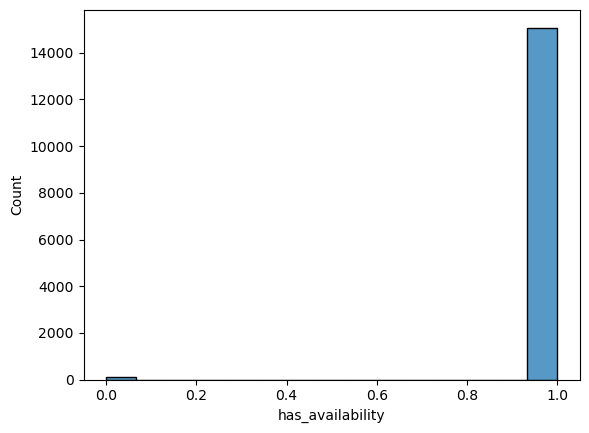

In [62]:
sns.histplot(data = listings_clean, x='has_availability')
plt.show()

### visualizacion "availability_30"

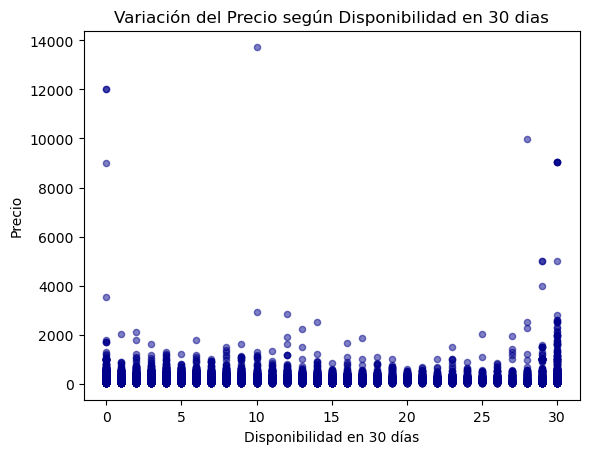

In [64]:
listings_clean.plot(kind='scatter', x='availability_30', y='price', color='darkblue', alpha=0.5)

plt.xlabel('Disponibilidad en 30 días')
plt.ylabel('Precio')
plt.title('Variación del Precio según Disponibilidad en 30 dias')
plt.show()

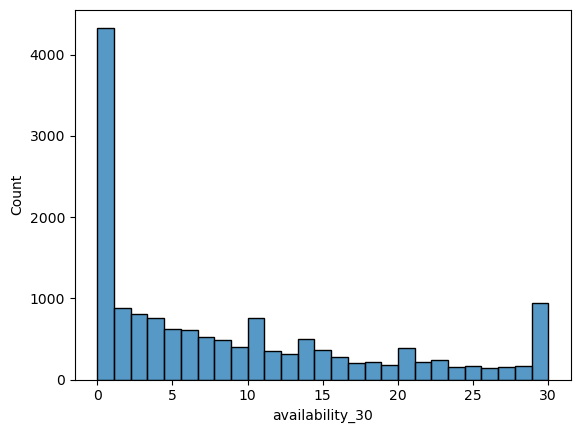

In [65]:
sns.histplot(data = listings_clean, x='availability_30')
plt.show()

### visualizacion "availability_60"

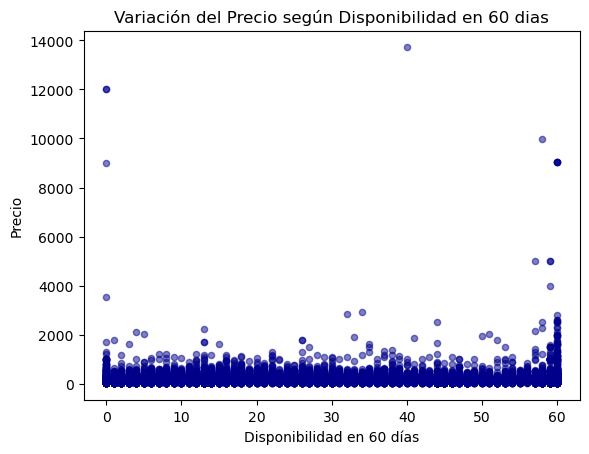

In [67]:
listings_clean.plot(kind='scatter', x='availability_60', y='price', color='darkblue', alpha=0.5)

plt.xlabel('Disponibilidad en 60 días')
plt.ylabel('Precio')
plt.title('Variación del Precio según Disponibilidad en 60 dias')
plt.show()

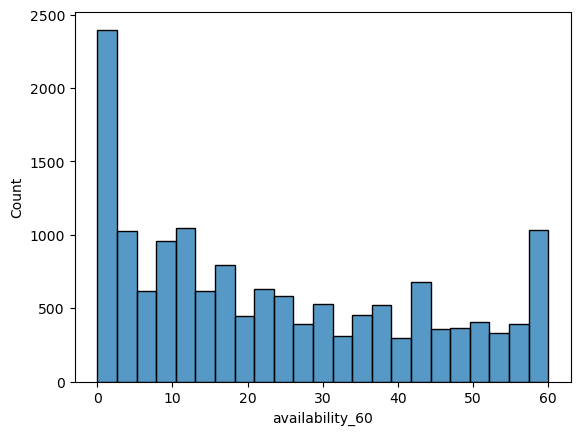

In [68]:
sns.histplot(data = listings_clean, x='availability_60')
plt.show()

### visualizacion "number_of_reviews"

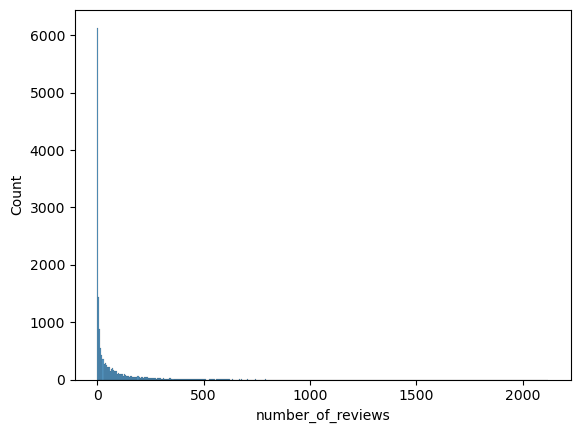

In [70]:
sns.histplot(data = listings_clean, x='number_of_reviews')
plt.show()

### visualizacion "review_scores_rating"

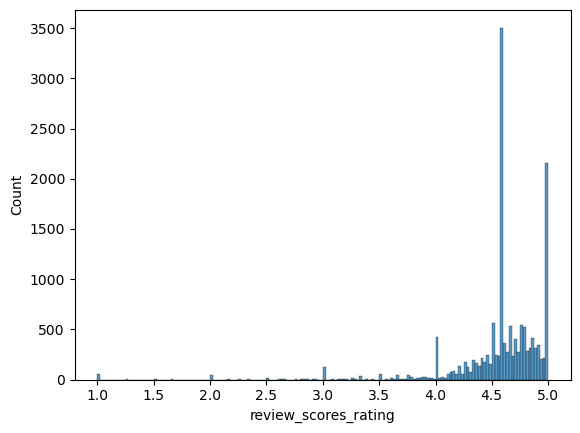

In [72]:
sns.histplot(data = listings_clean, x='review_scores_rating')
plt.show()

### visualizacion "review_scores_cleanliness"

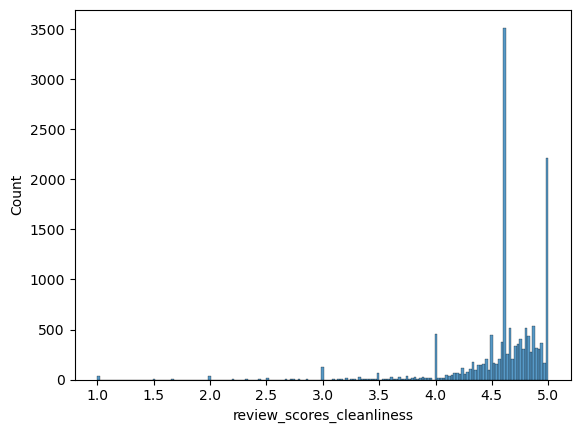

In [74]:
sns.histplot(data = listings_clean, x='review_scores_cleanliness')
plt.show()